# Imports and Setup

In [7]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import class_weight

# Add 'src' to path so we can import our scripts
module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data_loader import load_kaggle_csv, make_sequences

print("Laboratory Open: Ready for experiments!")

Laboratory Open: Ready for experiments!


# Experiment settings

In [8]:
EXP_LOOKBACK = 14       
EXP_BATCH_SIZE = 32     
EXP_EPOCHS = 5          # Keep low for quick testing
EXP_LEARNING_RATE = 0.001 # Try 0.01 (Fast/Reckless) or 0.0001 (Slow/Careful)

##  Regression (Rain Amount)

--- RUNNING REGRESSION TEST ---
Loading data from: c:\Users\Alvaro\OneDrive\Documents\Custom Office Templates\Desktop\Github\Fall_Projects\ML-Project\src\..\data\rain_prediction_dataset.csv
Filtering data for location: New York
Final dataset shape: (3655, 7)


c:\Users\Alvaro\OneDrive\Documents\Custom Office Templates\Desktop\Github\Fall_Projects\ML-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0339 - mae: 0.1467 - val_loss: 0.0309 - val_mae: 0.1484
Epoch 2/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0324 - mae: 0.1447 - val_loss: 0.0303 - val_mae: 0.1447
Epoch 3/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0319 - mae: 0.1448 - val_loss: 0.0301 - val_mae: 0.1406
Epoch 4/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0321 - mae: 0.1446 - val_loss: 0.0303 - val_mae: 0.1382
Epoch 5/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0322 - mae: 0.1446 - val_loss: 0.0304 - val_mae: 0.1452


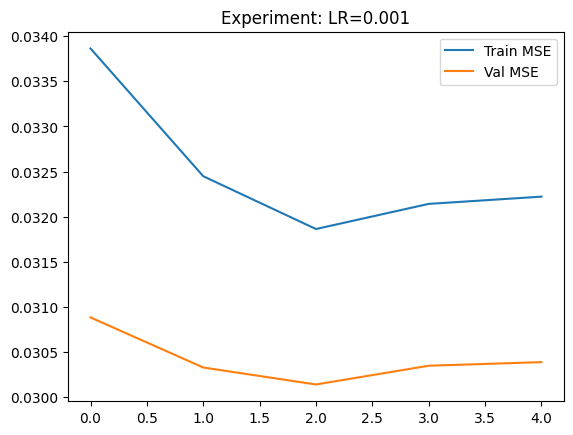

In [ ]:
print("--- RUNNING REGRESSION TEST ---")

# 1. Load Data 
df = load_kaggle_csv(target_col='Precipitation')
values = df.values
target_idx = df.columns.get_loc('Precipitation')

# 2. Prepare
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values)
X, y = make_sequences(scaled_data, EXP_LOOKBACK, target_idx)

# Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 3. Build Model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(EXP_LOOKBACK, 7)))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=EXP_LEARNING_RATE), loss='mse', metrics=['mae'])

# 4. Train
history = model.fit(
    X_train, y_train, 
    epochs=EXP_EPOCHS, 
    batch_size=EXP_BATCH_SIZE, 
    validation_data=(X_test, y_test),
    verbose=1
)

# 5. Result
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Val MSE')
plt.title(f'Experiment: LR={EXP_LEARNING_RATE}')
plt.legend()
plt.show()

## Classifier (Storm Detection)

--- RUNNING CLASSIFIER TEST ---
Loading data from: c:\Users\Alvaro\OneDrive\Documents\Custom Office Templates\Desktop\Github\Fall_Projects\ML-Project\src\..\data\rain_prediction_dataset.csv
Filtering data for location: New York
Final dataset shape: (3655, 7)
Using Weights: {0: np.float64(0.6338702655637788), 1: np.float64(2.367479674796748)}
Epoch 1/5


c:\Users\Alvaro\OneDrive\Documents\Custom Office Templates\Desktop\Github\Fall_Projects\ML-Project\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4894 - loss: 0.6955 - val_accuracy: 0.7737 - val_loss: 0.6852
Epoch 2/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4011 - loss: 0.6931 - val_accuracy: 0.7997 - val_loss: 0.6624
Epoch 3/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5381 - loss: 0.6924 - val_accuracy: 0.4911 - val_loss: 0.6943
Epoch 4/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5024 - loss: 0.6908 - val_accuracy: 0.3992 - val_loss: 0.7083
Epoch 5/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4973 - loss: 0.6916 - val_accuracy: 0.5226 - val_loss: 0.6914


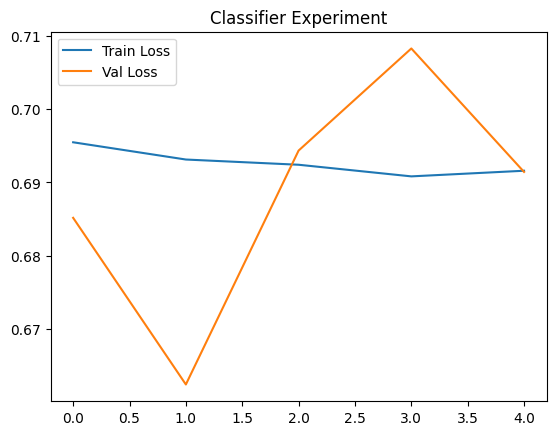

In [10]:
print("--- RUNNING CLASSIFIER TEST ---")

# 1. Load Data
df = load_kaggle_csv(target_col='Rain Tomorrow')
target_idx = df.columns.get_loc('Rain Tomorrow')
values = df.values

# 2. Prepare
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(values)
X, y = make_sequences(scaled_data, EXP_LOOKBACK, target_idx)

# Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 3. Calculate Class Weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: weights[0], 1: weights[1]}
print(f"Using Weights: {class_weights}")

# 4. Build Model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(EXP_LOOKBACK, 7)))
model.add(Dropout(0.3))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=EXP_LEARNING_RATE), loss='binary_crossentropy', metrics=['accuracy'])

# 5. Train
history = model.fit(
    X_train, y_train, 
    epochs=EXP_EPOCHS, 
    batch_size=EXP_BATCH_SIZE, 
    validation_data=(X_test, y_test),
    class_weight=class_weights,
    verbose=1
)

# 6. Result
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Classifier Experiment')
plt.legend()
plt.show()